In [45]:
from sklearn import datasets

In [46]:
X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [48]:
x=np.linspace(-10,10,100)

In [49]:
y1=-5*x+1

In [50]:
y2=-4*x+1

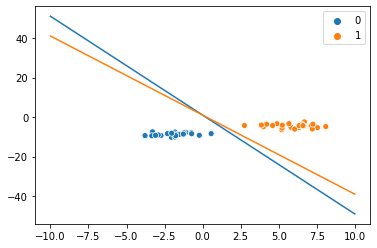

In [51]:
plt.plot(x,y1)
plt.plot(x,y2)
sns.scatterplot(X.T[0],X.T[1],hue=y)

Equation of the orange line:

y=-4x+1

Equation of the blue line:

y=-5x+1

You have to find out which line will act as a better classifier according to the SVM alsorithm and why?

In [52]:
data = pd.DataFrame(data=X,columns=['x1','x2'])
data['y'] = y
data.head(10)

,x1,x2,y
0,7.127313,-4.439442,1
1,6.688739,-2.448401,1
2,-1.100479,-7.784368,0
3,3.993379,-4.904513,1
4,-1.817162,-9.229099,0
5,-2.055219,-10.231412,0
6,4.203977,-3.611647,1
7,-0.218046,-9.219627,0
8,5.193276,-6.388451,1
9,-1.836821,-8.219521,0


In [53]:
class1,class2 = list(data[data.y==1][['x1','x2']].values),list(data[data.y==0][['x1','x2']].values)

# Function to find d for both the lines
def d_calc(data=data,line=1):
  res = 0
  # Lines : y = -5x + 1 ; y = -4x + 1
  # For the first line(blue)
  if line == 1:
    c1,c2 = [],[]
    # Support vector for class1(y=1)
    for i in range(len(class1)):
      dist = abs((class1[i][1] + (5*class1[i][0]) - 1))/np.sqrt((5)**2 + 1**2)
      c1.append(dist)
    # Support vector for class2(y=0)
    for i in range(len(class2)):
      dist = abs((class2[i][1] + (5*class2[i][0]) - 1))/np.sqrt((5)**2 + 1**2)
      c2.append(dist)
    res = min(c1) + min(c2)
  if line == 2:
    c1,c2 = [],[]
    # Support vector for class1(y=1)
    for i in range(len(class1)):
      dist = abs((class1[i][1] + (4*class1[i][0]) - 1))/np.sqrt((4)**2 + 1**2)
      c1.append(dist)
    # Support vector for class2(y=0)
    for i in range(len(class2)):
      dist = abs((class2[i][1] + (4*class2[i][0]) - 1))/np.sqrt((4)**2 + 1**2)
      c2.append(dist)
    res = min(c1) + min(c2)
  return res

# Function to decide the svm decision boundary
def svm_bound(data=data):
  d1 = d_calc(data,line=1)
  d2 = d_calc(data,line=2)
  if d1 > d2:
    return "blue"
  else:
    return "orange"

In [54]:
line_color = svm_bound(data=data)
print("The {} line is a better classifier".format(line_color.upper()))

The ORANGE line is a better classifier


## Reason of this result :
According to the function svm_bound(), the maximal thresholds for both the lines are calculated. *The function returns the color of the line for which the value of maximal threshold is maximum.*

Since the function returns "*orange*", hence we can conclude that :

***The maximal threshold of Orange line > maximal threshold of Blue line.***

So, *the orange line is a better classifier.*